In [12]:
import mglearn
import graphviz
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import pandas as pd

In [9]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [2]:
cancer = load_breast_cancer()

In [3]:
x = cancer.data
y = cancer.target

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0,test_size=0.3)

In [6]:
mlp = MLPClassifier(random_state=42)
mlp.fit(x_train, y_train)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=42)

In [7]:
print('훈련 세트 정확도 : {:2f}'.format(mlp.score(x_train, y_train)))
print('테스트 세트 정확도 : {:2f}'.format(mlp.score(x_test, y_test)))

훈련 세트 정확도 : 0.929648
테스트 세트 정확도 : 0.953216


- 인공신경망의 데이터는 평균이 0, 분산1이 되도록 변형
- 이 조건에 맞도록 데이터의 스케일을 조정해보자

In [22]:
from sklearn.preprocessing import StandardScaler

In [44]:
# 스케일러 불러오기
scaler = StandardScaler()
# 스케일러 학습
scaler.fit(x_train)

StandardScaler()

In [24]:
# 데이터스케일 변환
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:

# scaler = StandardScaler()
# x_Train_scaled = scaler.fit_transform(x_train)
# x_test_scaled = scaler.transform(x_test)

In [27]:
mlp = MLPClassifier(random_state=0)
mlp.fit(x_train_scaled, y_train)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=0)

In [26]:
print('훈련 세트 정확도 : {:.3f}'.format(mlp.score(x_train, y_train)))
print('테스트 세트 정확도 : {:.3f}'.format(mlp.score(x_test, y_test)))

훈련 세트 정확도 : 0.932
테스트 세트 정확도 : 0.965


In [28]:
mlp = MLPClassifier(random_state=0, max_iter=3000)
mlp.fit(x_train_scaled, y_train)

MLPClassifier(max_iter=3000, random_state=0)

In [35]:
print('훈련 세트 정확도 : {:.3f}'.format(mlp.score(x_train_scaled, y_train)))
print('테스트 세트 정확도 : {:.3f}'.format(mlp.score(x_test_scaled, y_test)))

훈련 세트 정확도 : 0.990
테스트 세트 정확도 : 0.971


### Stochastic Optimizer : Maximum iterations (200) reached and the optimization hasn't converged yet.

In [36]:
mlp = MLPClassifier(random_state=0, max_iter=3000)
mlp.fit(x_train_scaled, y_train)

MLPClassifier(max_iter=3000, random_state=0)

In [37]:
print('훈련 세트 정확도 : {:.3f}'.format(mlp.score(x_train_scaled, y_train)))
print('테스트 세트 정확도 : {:.3f}'.format(mlp.score(x_test_scaled, y_test)))

훈련 세트 정확도 : 0.995
테스트 세트 정확도 : 0.977


In [38]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(x_train_scaled, y_train)

MLPClassifier(alpha=1, max_iter=1000, random_state=0)

In [41]:
print('훈련 세트 정확도 : {:.3f}'.format(mlp.score(x_train_scaled, y_train)))
print('테스트 세트 정확도 : {:.3f}'.format(mlp.score(x_test_scaled, y_test)))

훈련 세트 정확도 : 0.990
테스트 세트 정확도 : 0.971


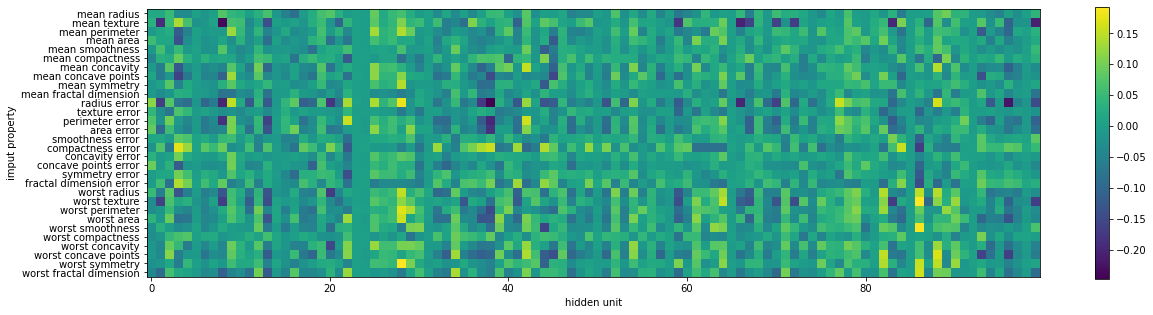

In [43]:
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis') #가중치
plt.yticks(range(30), cancer.feature_names)
plt.xlabel('hidden unit')
plt.ylabel('imput property')
plt.colorbar()

- 모델의 가중치를 확인해보면 어떤 특성이 학습되었는지 알 수 있음
- 입력층과 은닉층 사이에 위치한 학습된 가중치를 보여줌
- 지금 그래프는 행은 30개 입력특성(feature)는 100개의 은닉유닉에 해당함
- 이 그래프에서 밝은색은 높은 값, 어두운색은 음수나 낮은값을 나타냄

- 어두운 색들 : 특성들은 덜 중요하거나 신경망에 적절하게 입력이 되지 않았을 수 도 있다.

### PCA

In [48]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import mglearn
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [49]:
cancer = load_breast_cancer()

PCA 적용해서 유방암 데이터셋 시각화하기

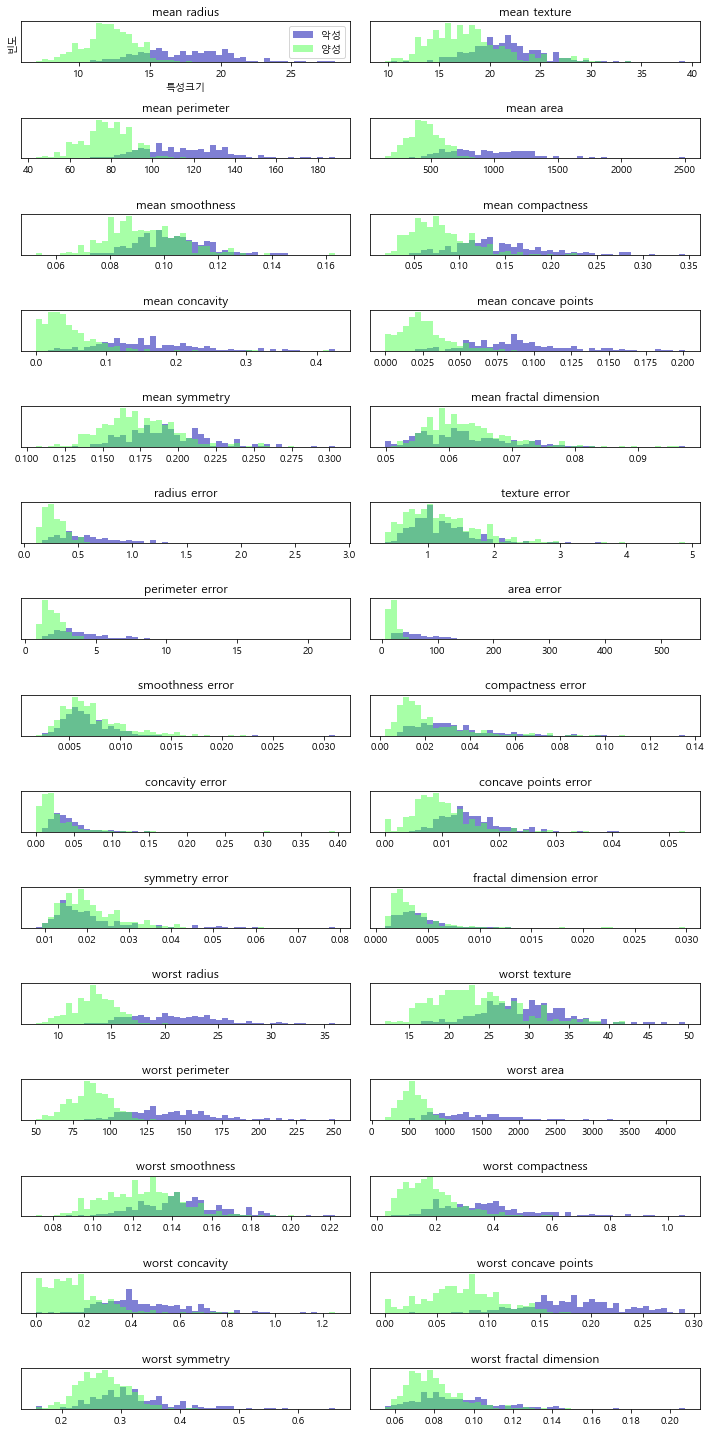

In [54]:
fig, axes = plt.subplots(15, 2, figsize=(10,20))

malignant = cancer.data[cancer.target==0] #악성
benign = cancer.data[cancer.target==1]    #양성

ax = axes.ravel()  #차원축소함수 ravel()
for i in range(30) :
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel('특성크기')
ax[0].set_ylabel('빈도')
ax[0].legend(['악성','양성'], loc='best')
fig.tight_layout()

### 양성, 악성별 주성분 그래프 그려보기

In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(cancer.data)
x_scale = scaler.transform(cancer.data)

## pca 적용

In [57]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) #악성,양성 2개 뽑아본다
pca.fit(x_scale)

PCA(n_components=2)

In [58]:
# 처음 두 개의 주성분을 사용해서 데이터 변환
x_pca = pca.transform(x_scale)

In [59]:
print('원본 데이터 형태 :', str(x_scale.shape))
print('축소된 데이터 형태 :', str(x_pca.shape))

원본 데이터 형태 : (569, 30)
축소된 데이터 형태 : (569, 2)


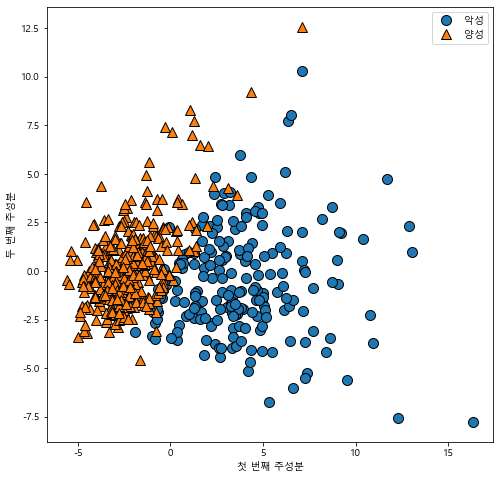

In [61]:
# 클래스를 색깔로 구분해서 처음 두 개 주성분을 그래프로 나타내기

plt.figure(figsize=(8,8))
mglearn.discrete_scatter(x_pca[:,0], x_pca[:,1], cancer.target)
plt.legend(['악성','양성'], loc='best')
plt.xlabel('첫 번째 주성분')
plt.ylabel('두 번째 주성분')
plt.show()

In [62]:
print('주성분 :',pca.components_) #주성분 값

주성분 : [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


## 안면

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
import mglearn
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7) #20개의 사진
image_shape = people.images[0].shape

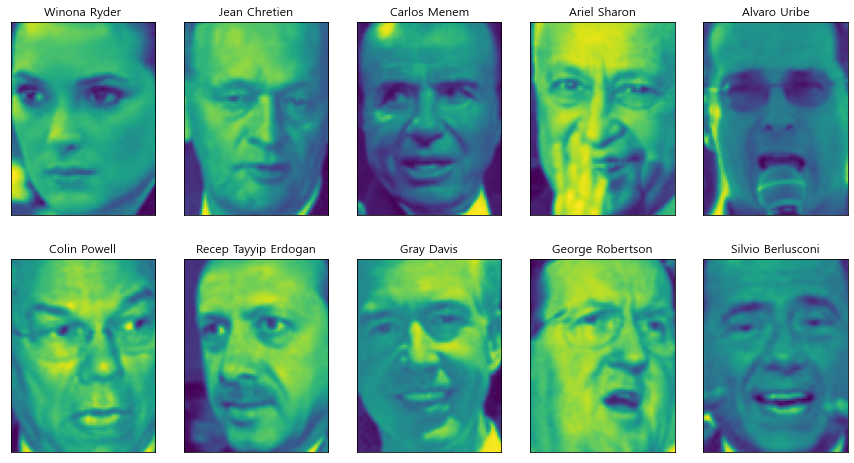

In [3]:
fig, axes = plt.subplots(2, 5, figsize=(15,8),
                        subplot_kw={'xticks':(), 'yticks':()})

for target, image, ax in zip(people.target, people.images, axes.ravel()) :
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [4]:
people.target[:10], people.target_names[people.target[0:10]]

(array([61, 25,  9,  5,  1, 10, 48, 17, 13, 54], dtype=int64),
 array(['Winona Ryder', 'Jean Chretien', 'Carlos Menem', 'Ariel Sharon',
        'Alvaro Uribe', 'Colin Powell', 'Recep Tayyip Erdogan',
        'Gray Davis', 'George Robertson', 'Silvio Berlusconi'],
       dtype='<U25'))

In [5]:
print('people :', people.images.shape)            #사람 수 65명
print('클래스 개수 :', len(people.target_names)) #사람이름은 62개

people : (3023, 87, 65)
클래스 개수 : 62


In [6]:
# 각 타깃을 나타난 횟수
counts = np.bincount(people.target)
counts

array([ 39,  35,  21,  36,  20,  77,  42,  24,  29,  21, 236,  31, 121,
        22, 530, 109,  44,  26,  30,  22,  39,  71,  20,  28,  52,  55,
        21,  42,  21,  24,  20,  53,  31,  23,  28,  60,  32,  41,  22,
        41,  48,  29,  33,  20,  22,  37,  20,  22,  30,  27,  32,  26,
        23,  52,  33,  23,  25,  33, 144,  32,  49,  24], dtype=int64)

In [11]:
# 타깃별 이름과 횟수 출력
for i, (count, name) in enumerate(zip(counts, people.target_names)) :
    print('{0:25} {1:3}'.format(name, count), end='    ')
    if (i + 1) % 3 == 0 :
        print()

Alejandro Toledo           39    Alvaro Uribe               35    Amelie Mauresmo            21    
Andre Agassi               36    Angelina Jolie             20    Ariel Sharon               77    
Arnold Schwarzenegger      42    Atal Bihari Vajpayee       24    Bill Clinton               29    
Carlos Menem               21    Colin Powell              236    David Beckham              31    
Donald Rumsfeld           121    George Robertson           22    George W Bush             530    
Gerhard Schroeder         109    Gloria Macapagal Arroyo    44    Gray Davis                 26    
Guillermo Coria            30    Hamid Karzai               22    Hans Blix                  39    
Hugo Chavez                71    Igor Ivanov                20    Jack Straw                 28    
Jacques Chirac             52    Jean Chretien              55    Jennifer Aniston           21    
Jennifer Capriati          42    Jennifer Lopez             21    Jeremy Greenstock          24    


In [ ]:
#pca 적용 전 pca 적용 후

In [13]:
# target.shape만큼 0으로 채움
mask = np.zeros(people.target.shape, dtype=bool) 

for target in np.unique(people.target) :
    mask[np.where(people.target==target)[0][:50]]=1
    
x_people = people.data[mask] 
y_people = people.target[mask]

x_people = x_people / 255. #흑백이미지는 0~255픽셀을 가지기 때문에 255로 나눠준다(?)

In [22]:
from sklearn.neighbors import KNeighborsClassifier

# 훈련, 테스트 데이터 나누기
x_train, x_test, y_train, y_test = train_test_split(x_people, y_people, stratify=y_people,random_state=0, test_size=0.3)


knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)
print('훈련 정확도 :',knn.score(x_train, y_train))
print('테스트 정확도 :',knn.score(x_test, y_test))

훈련 정확도 : 0.6114958448753463
테스트 정확도 : 0.21809369951534732


In [23]:
pca = PCA(n_components=100, whiten=True, random_state=0)
pca.fit(x_train)

PCA(n_components=100, random_state=0, whiten=True)

In [24]:
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

In [27]:
x_train_pca.shape

(1444, 100)

In [29]:
y_train.shape

(1444,)

In [30]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_pca, y_train)

KNeighborsClassifier(n_neighbors=3)

In [31]:
knn.score(x_train_pca, y_train)

0.621191135734072

In [32]:
knn.score(x_test_pca, y_test)

0.2407108239095315

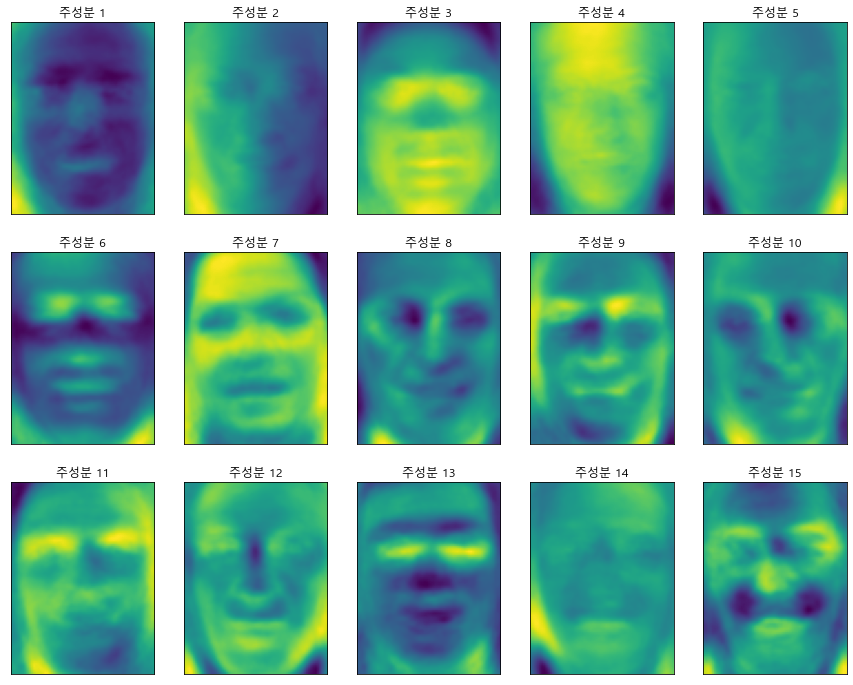

In [35]:
fig, axes = plt.subplots(3,5, figsize=(15,12),
                        subplot_kw={'xticks':(), 'yticks':()})

for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())) :
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title('주성분 {}'.format(i+1))

In [40]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits #숫자 데이터
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [57]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [58]:
digits = load_digits()

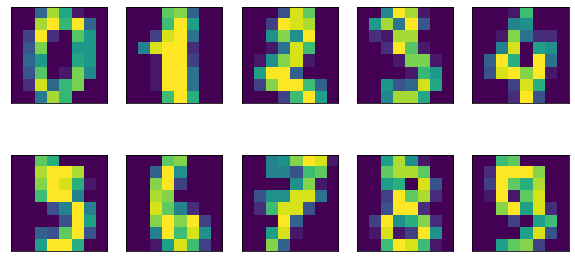

In [44]:
fig, axes = plt.subplots(2,5, figsize=(10,5),
                        subplot_kw={'xticks':(), 'yticks':()})

for ax, img in zip(axes.ravel(), digits.images) :
    ax.imshow(img)

In [45]:
# PCA 모델을 생성
pca = PCA(n_components=2)
pca.fit(digits.data)

PCA(n_components=2)

In [46]:
digits_pca = pca.transform(digits.data)

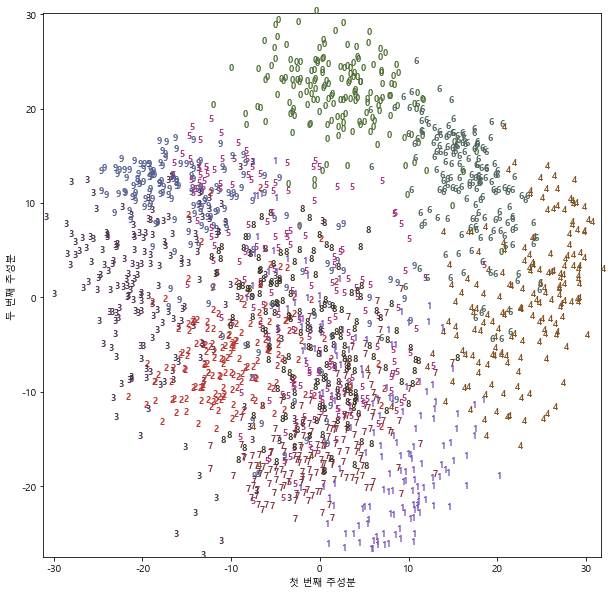

In [49]:
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120","#535D8E"]
plt.figure(figsize=(10,10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())

for i in range(len(digits.data)) :
    
    plt.text(digits_pca[i,0], digits_pca[i,1], str(digits.target[i]),
            color = colors[digits.target[i]],
            fontdict={'weight': 'bold', 'size':9})
    
plt.xlabel('첫 번째 주성분')
plt.ylabel('두 번째 주성분')
plt.show()

In [59]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state=42)

In [60]:
digits_tsne = tsne.fit_transform(digits.data)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


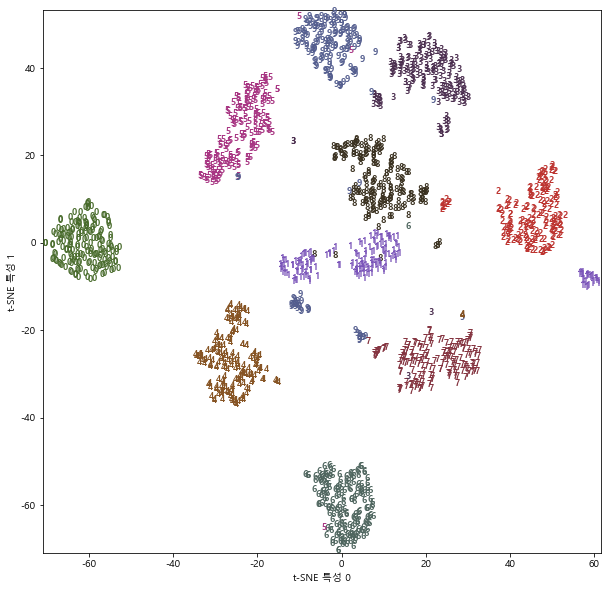

In [62]:
plt.figure(figsize=(10,10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:,0].max() +1)
plt.ylim(digits_tsne[:,1].min(), digits_tsne[:,1].max() +1)

for i in range(len(digits.data)) :
    
    plt.text(digits_tsne[i,0], digits_tsne[i,1], str(digits.target[i]),
                                          color = colors[digits.target[i]],
                                          fontdict={'weight':'bold','size':9})

plt.xlabel('t-SNE 특성 0')
plt.ylabel('t-SNE 특성 1')
plt.show()

In [63]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [64]:
iris = load_iris()

In [66]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [67]:
tsne = TSNE(n_components=2).fit_transform(df)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [68]:
tsne

array([[-26.330738 ,   9.172901 ],
       [-28.9396   ,  10.015527 ],
       [-28.979414 ,   8.811449 ],
       [-29.345463 ,   9.072449 ],
       [-26.311075 ,   8.69126  ],
       [-24.339418 ,   8.87204  ],
       [-28.677494 ,   8.251867 ],
       [-27.072544 ,   9.273388 ],
       [-30.113657 ,   9.11032  ],
       [-28.518414 ,   9.7651415],
       [-24.800041 ,   9.512731 ],
       [-27.762375 ,   8.773652 ],
       [-29.260883 ,   9.724438 ],
       [-30.277502 ,   8.511178 ],
       [-23.459885 ,   9.532574 ],
       [-23.301464 ,   8.974232 ],
       [-24.194471 ,   9.232495 ],
       [-26.278236 ,   9.303041 ],
       [-23.995485 ,   9.771492 ],
       [-25.274538 ,   8.678169 ],
       [-25.41532  ,  10.314457 ],
       [-25.547441 ,   8.889302 ],
       [-28.558449 ,   7.433075 ],
       [-26.799284 ,  10.545958 ],
       [-27.677717 ,   8.23659  ],
       [-28.544489 ,  10.325326 ],
       [-26.89674  ,   9.975327 ],
       [-25.886343 ,   9.541657 ],
       [-26.234509 ,

In [69]:
tsne_df = pd.DataFrame(tsne, columns = ['component0', 'component1'])

In [70]:
tsne_df

,component0,component1
0,-26.330738,9.172901
1,-28.939600,10.015527
2,-28.979414,8.811449
3,-29.345463,9.072449
4,-26.311075,8.691260
...,...,...
145,16.563978,-6.701600
146,13.736715,-5.258460
147,15.749442,-6.291317
148,17.049734,-7.536057


### t-SNE 2차원 데이터 시각화

In [71]:
tsne_df['target'] = iris.target

In [72]:
tsne_df

,component0,component1,target
0,-26.330738,9.172901,0
1,-28.939600,10.015527,0
2,-28.979414,8.811449,0
3,-29.345463,9.072449,0
4,-26.311075,8.691260,0
...,...,...,...
145,16.563978,-6.701600,2
146,13.736715,-5.258460,2
147,15.749442,-6.291317,2
148,17.049734,-7.536057,2


In [73]:
tsne_df_0 = tsne_df[tsne_df['target']==0]
tsne_df_1 = tsne_df[tsne_df['target']==1]
tsne_df_2 = tsne_df[tsne_df['target']==2]

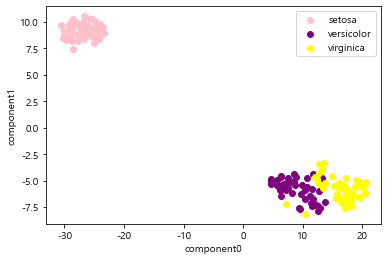

In [75]:
plt.scatter(tsne_df_0['component0'], tsne_df_0['component1'],
           color='pink', label= 'setosa')
plt.scatter(tsne_df_1['component0'], tsne_df_1['component1'],
           color ='purple', label = 'versicolor')
plt.scatter(tsne_df_2['component0'], tsne_df_2['component1'],
           color = 'yellow', label = 'virginica')

plt.xlabel('component0')
plt.ylabel('component1')
plt.legend()
plt.show()

### 3차원 t-sne 시각화

In [78]:
# t-sne 모델 불러오기

tsne = TSNE(n_components=3).fit_transform(df) #3차원

tsne_df = pd.DataFrame(tsne, columns=['component0','component1','component2'])

C:\Users\admin\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [79]:
tsne_df

,component0,component1,component2
0,46.531734,-50.792957,-64.020149
1,-70.433159,-61.046623,-112.586960
2,-20.262108,-0.957463,-107.394836
3,-3.382345,-63.562252,-168.245697
4,-17.423409,-119.391060,-89.317261
...,...,...,...
145,-20.832052,65.626778,136.552612
146,17.017960,20.029276,67.702957
147,69.765869,41.943584,66.718956
148,108.911499,56.057217,106.492004


In [80]:
from mpl_toolkits.mplot3d import Axes3D #3차원 구현

In [83]:
tsne_df['target'] = iris.target

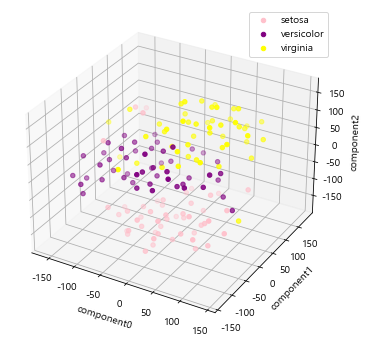

In [86]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, projection='3d')

tsne_df_0 = tsne_df[tsne_df['target']==0]
tsne_df_1 = tsne_df[tsne_df['target']==1]
tsne_df_2 = tsne_df[tsne_df['target']==2]

ax.scatter(tsne_df_0['component0'], tsne_df_0['component1'], tsne_df_0['component2']
        ,color='pink', label = 'setosa')
ax.scatter(tsne_df_1['component0'], tsne_df_1['component1'], tsne_df_1['component2']
          ,color='purple', label='versicolor')
ax.scatter(tsne_df_2['component0'], tsne_df_2['component1'], tsne_df_2['component2']
          ,color='yellow', label='virginia')

ax.set_xlabel('component0')
ax.set_ylabel('component1')
ax.set_zlabel('component2')
ax.legend()
plt.show()

In [89]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import mglearn
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [90]:
x, y = make_blobs(random_state=1)

In [91]:
kmeans = KMeans(n_clusters = 3) #3개의 군집
kmeans.fit(x)

KMeans(n_clusters=3)

In [93]:
print(kmeans.labels_)

[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


In [92]:
print(kmeans.predict(x))

[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


In [94]:
x[0]

array([-0.79415228,  2.10495117])

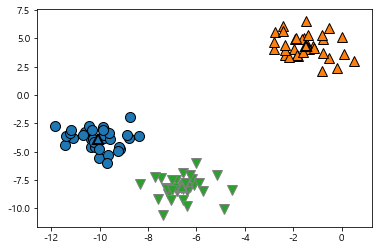

In [97]:
mglearn.discrete_scatter(x[:,0],x[:,1],kmeans.labels_)
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
                         [0,1,2],markers='^', markeredgewidth=2) #중심값 표시 ^
                    #
plt.show()

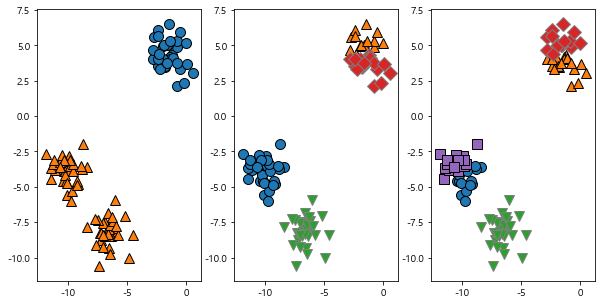

In [104]:
fig, axes = plt.subplots(1,3, figsize=(10,5))

# k 개수가 2개인 것 부터
kmeans2 = KMeans(n_clusters=2)
kmeans2.fit(x)
assignment2 = kmeans2.labels_ # 예측한 값 할당

mglearn.discrete_scatter(x[:,0],x[:,1], assignment2, ax=axes[0])

# k 4개
kmeans4 = KMeans(n_clusters=4)
kmeans4.fit(x)
assignment4 = kmeans4.labels_

mglearn.discrete_scatter(x[:,0],x[:,1], assignment4, ax=axes[1])

# k 5개
kmeans5 = KMeans(n_clusters=5)
kmeans5.fit(x)
assignment5 = kmeans5.labels_

mglearn.discrete_scatter(x[:,0],x[:,1], assignment5, ax=axes[2])